# Table des Matières
1. [Introduction et Sélection des données](#intro)
2. [Exploration et traitement des données](#traitement)
3. [Modélisation et évaluation](#model)
4. [Comunication des résultats](#comm)
5. [Retour d'expérience](#retour) 

  
 

---

## Introduction et sélection des données <a class="anchor" id="intro"></a>

lien data : https://drive.google.com/file/d/1nUbA6m3SQ9PXpc9i9tD6yADe0fDFYKTc/view?usp=drive_link

Dans le cadre de notre projet de machine Learning, nous allons traiter un sujet d'apprentissage supervisé à partir de données ouvertes. Tout au long de notre projet, nous utiliserons l'IA générative pour nous aider dans notre travail. 

Dans un premier temps, nous commençons par demander à ChatGPT des idées de sujets.

Jeu de données ML généré par l'IA 
- DPE (Analyse énergétique, classification des logements)
- Transports en commun (prédiction affluence, optimisation trajet)
- Pollution (prédiction des pics de pollution, classification zones polluées)
- Reconnaissance d'image
- Traitement du langage naturel
- Donnée de santé
- Donnée financière économique (prédiction de tendance..)

Analyse critique de l'IA
L'IA propose souvent des sujets très classiques, déjà réalisé. Il propose même des projets déjà tout fait sur Kaggle. Il manque d'originalité
Donnée DPE 

Problématique générée avec L'IA :

Peut-on prédire la consommation énergétique d’un logement à partir de ses caractéristiques issues du DPE ?
-> sujet commun en ML

Quels logements sont susceptibles d’être classés comme passoires thermiques (classe F ou G) ?
-> Sujet choisi puisqu'il plus original que les autres 

Peut-on prédire la classe énergétique (A à G) d’un logement à partir des caractéristiques fournies par le DPE ?
-> Sujet déjà réalisé

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("data/data_dpe.csv")

/var/folders/rc/xhmcyg0x1d9b_n3m80ww6sxr0000gn/T/ipykernel_45845/1481629039.py:1: DtypeWarning: Columns (11,48,51,218,219,220,221,222) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data_dpe.csv")


In [4]:
variables_importantes = [
    # Consommations
    'Conso_5_usages_é_finale', 
    'Conso_5_usages/m²_é_finale', 
    'Conso_chauffage_é_finale', 
    'Conso_ECS_é_finale',
    
    # Isolation
    'Deperditions_baies_vitrées', 
    'Deperditions_enveloppe', 
    'Ubat_W/m²_K', 
    'Qualité_isolation_enveloppe',
    
    # Système de chauffage
    'Type_installation_chauffage', 
    'Type_énergie_principale_chauffage', 
    'Type_émetteur_installation_chauffage_n°1',
    
    # Structure du bâtiment
    'Année_construction', 
    'Période_construction', 
    'Surface_habitable_logement', 
    'Nombre_niveau_logement',
    'Hauteur_sous-plafond',

    
    # Localisation
    'Zone_climatique_', 
    'Classe_altitude', 
    'N°_région_(BAN)', 
    'N°_département_(BAN)',

    # Etiquette 
    'Etiquette_GES',
    'Etiquette_DPE'
]

df_filtered = df[variables_importantes]

## Exploration et traitement des données <a class="anchor" id="traitement"></a>

Critique de l'IA sur notre approche : 
Votre approche est bien structurée et inclut des variables clés dans des domaines pertinents pour prédire si un logement est une passoire thermique. 

Points positifs :
Les variables sélectionnées correspondent bien à des déterminants majeurs de la performance énergétique.
Vous incluez à la fois des variables quantitatives (ex. : consommation énergétique, déperditions) et qualitatives (ex. : type d'installation de chauffage, zone climatique), ce qui permet une modélisation riche.

Critiques et suggestions :

Les bases de données DPE peuvent contenir des valeurs manquantes ou aberrantes (ex. : surfaces non renseignées, consommations incohérentes).
Vérifiez les distributions des variables pour détecter des anomalies.
Plusieurs variables peuvent être fortement corrélées. Une analyse des corrélations peut être utile.
Les passoires thermiques (F et G) pourraient représenter une minorité des données. Cela peut biaiser l’entraînement du modèle.
Les bâtiments anciens sont souvent surreprésentés parmi les passoires thermiques, ce qui peut conduire le modèle à négliger d'autres facteurs. Une analyse exploratoire approfondie est nécessaire.
Les algorithmes robustes pour ce type de problème incluent :
 Forêts aléatoires (Random Forests): pour leur interprétabilité et leur capacité à gérer des variables mixtes.
 Gradient Boosting (XGBoost, LightGBM) : pour leur performance sur des ensembles déséquilibrés.
 Réseaux de neurones : si les données sont enrichies avec des caractéristiques complexes (géographiques, temporelles).

### Traitement des valeurs manquantes <a class="anchor" id="traitement"></a>

In [5]:
pourcentage_valeurs_manquantes = df_filtered.isnull().mean() * 100
pourcentage_valeurs_manquantes

Conso_5_usages_é_finale                      0.018056
Conso_5_usages/m²_é_finale                   0.018056
Conso_chauffage_é_finale                     0.017361
Conso_ECS_é_finale                           0.000000
Deperditions_baies_vitrées                   0.049306
Deperditions_enveloppe                       0.047917
Ubat_W/m²_K                                  0.000000
Qualité_isolation_enveloppe                  0.000000
Type_installation_chauffage                 26.892361
Type_énergie_principale_chauffage            0.053472
Type_émetteur_installation_chauffage_n°1     0.060417
Année_construction                          13.156944
Période_construction                         0.000000
Surface_habitable_logement                   2.902778
Nombre_niveau_logement                       3.174306
Hauteur_sous-plafond                         0.000000
Zone_climatique_                             0.050694
Classe_altitude                              0.050694
N°_région_(BAN)             

In [ ]:
import pandas as pd
import numpy as np

# Imports scikit-learn (tous en début de code)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import (
    KFold, 
    StratifiedKFold, 
    cross_val_score
)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# ==================================================================
# 1)  FONCTION : Nettoyage des types (pour éviter mélange float/str)
# ==================================================================
def clean_data_types(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convertit les colonnes object en numeric si possible.
    Sinon, force en string.

    Exemple de problème résolu :
    - Si une colonne 'object' contient des valeurs comme [12, 15.3, 'abc'],
      Pandas ne sait pas si c'est un float ou un string.
    - On essaie to_numeric, si ValueError => forçage en string.

    Retourne le DataFrame modifié.
    """
    df_cleaned = df.copy()
    # Parcourir toutes les colonnes de type object
    for col in df_cleaned.select_dtypes(include=['object']).columns:
        try:
            # On tente la conversion en numérique
            df_cleaned[col] = pd.to_numeric(df_cleaned[col])
        except ValueError:
            # Si erreur, c'est qu'il y a des valeurs non numériques
            # => on force en str pour clarifier
            df_cleaned[col] = df_cleaned[col].astype(str)
    return df_cleaned


# ==================================================================
# 2)  FONCTION : Imputation d'UNE colonne via RandomForest + CV
# ==================================================================
def impute_column_with_model_cv(df: pd.DataFrame,
                                target_col: str,
                                cv_splits=5,
                                random_state=42) -> pd.DataFrame:
    """
    Impute la colonne `target_col` de df via un modèle entraîné en cross-validation.
    
    - Si la colonne est numérique -> RandomForestRegressor + KFold (scoring R²).
    - Si la colonne est catégorielle -> RandomForestClassifier + StratifiedKFold (scoring accuracy).
    - Cross-validation pour estimer la performance -> fit final -> prédiction pour NaN -> mise à jour df.
    """

    # --- Séparer lignes connues vs. manquantes
    df_known = df[df[target_col].notna()].copy()
    df_unknown = df[df[target_col].isna()].copy()

    # Si aucune valeur manquante, on ne fait rien
    if df_unknown.empty:
        print(f"Pas de NaN dans la colonne '{target_col}'. Aucune imputation nécessaire.")
        return df

    # Vérifier si la cible est numérique ou non
    is_numeric = np.issubdtype(df_known[target_col].dtype, np.number)

    # --- Préparation de X et y
    y = df_known[target_col]
    X = df_known.drop(columns=[target_col])

    # Identification des colonnes numériques et catégorielles
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # Pipelines de prétraitement
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")), 
        ("scaler", StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Inconnu")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_cols),
            ("cat", categorical_transformer, categorical_cols),
        ],
        remainder="drop"
    )

    # Choix du modèle + type de cross-validation
    if is_numeric:
        model = RandomForestRegressor(
            n_estimators=50,  # Ajustez si besoin
            random_state=random_state,
            n_jobs=-1
        )
        cv = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
        scoring = "r2"
    else:
        model = RandomForestClassifier(
            n_estimators=50,  # Ajustez si besoin
            random_state=random_state,
            n_jobs=-1
        )
        cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
        scoring = "accuracy"

    # Pipeline final
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    # --- Cross-validation pour estimer la performance
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    if is_numeric:
        print(f"[{target_col}] Régression (CV={cv_splits}, {scoring}): "
              f"{scores.mean():.3f} ± {scores.std():.3f} | n={len(X)}")
    else:
        print(f"[{target_col}] Classification (CV={cv_splits}, {scoring}): "
              f"{scores.mean():.3f} ± {scores.std():.3f} | n={len(X)}")

    # --- Entraînement final sur 100% des données connues
    pipeline.fit(X, y)

    # --- Prédiction sur les lignes manquantes
    X_unknown = df_unknown.drop(columns=[target_col])
    y_unknown_pred = pipeline.predict(X_unknown)

    # --- Remplacement dans df
    df.loc[df_unknown.index, target_col] = y_unknown_pred

    return df


# ==================================================================
# 3)  FONCTION : Imputation de TOUTES les colonnes manquantes
# ==================================================================
def impute_all_missing_with_cv(df: pd.DataFrame,
                               cv_splits=5,
                               random_state=42) -> pd.DataFrame:
    """
    Impute TOUTES les colonnes manquantes (sauf 'Type_installation_chauffage') 
    via cross-validation et un RandomForest 
    (régression ou classification selon le type de la colonne).
    - Nettoie d'abord les types pour éviter float/str mélangés.
    - Supprime 'Type_installation_chauffage'.
    - Impute chaque autre colonne manquante via 'impute_column_with_model_cv'.
    """

    # 1) Nettoyer les types pour éviter l'erreur float/str
    df_cleaned = clean_data_types(df)

    # 2) Supprimer la variable trop incomplète : 'Type_installation_chauffage'
    if 'Type_installation_chauffage' in df_cleaned.columns:
        df_cleaned.drop(columns=['Type_installation_chauffage'], inplace=True, errors='ignore')
        print("Colonne 'Type_installation_chauffage' supprimée (trop de NaN).")

    # 3) Identifier les colonnes qui comportent des valeurs manquantes
    missing_cols = df_cleaned.columns[df_cleaned.isna().any()].tolist()
    print("Colonnes à imputer :", missing_cols)

    # 4) Boucler sur chaque colonne à imputer
    for col in missing_cols:
        print(f"\n=== Imputation de '{col}' ===")
        df_cleaned = impute_column_with_model_cv(
            df_cleaned,
            target_col=col,
            cv_splits=cv_splits,
            random_state=random_state
        )

    # Vérifier qu'il ne reste plus de NaN
    nb_nan = df_cleaned.isna().sum().sum()
    if nb_nan == 0:
        print("\nToutes les colonnes ont été imputées avec succès, plus de NaN restants.")
    else:
        print(f"\nATTENTION : Il reste {nb_nan} valeurs manquantes dans le DataFrame.")

    return df_cleaned


# ==================================================================
# 4)  EXEMPLE D'EXÉCUTION
# ==================================================================
# Supposons que votre DataFrame s'appelle df_filtered 
# et qu'il contient ~150k lignes avec plusieurs colonnes manquantes.
# Vous pouvez simplement exécuter :

df_final = impute_all_missing_with_cv(df_filtered, cv_splits=5, random_state=42)
print("Taille finale :", df_final.shape)

# => df_final est votre DataFrame complet, sans NaN pour les colonnes traitées.


Colonne 'Type_installation_chauffage' supprimée (trop de NaN).
Colonnes à imputer : ['Conso_5_usages_é_finale', 'Conso_5_usages/m²_é_finale', 'Conso_chauffage_é_finale', 'Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Année_construction', 'Surface_habitable_logement', 'Nombre_niveau_logement', 'N°_région_(BAN)']

=== Imputation de 'Conso_5_usages_é_finale' ===


### Corrélation entre les variables <a class="anchor" id="traitement"></a>

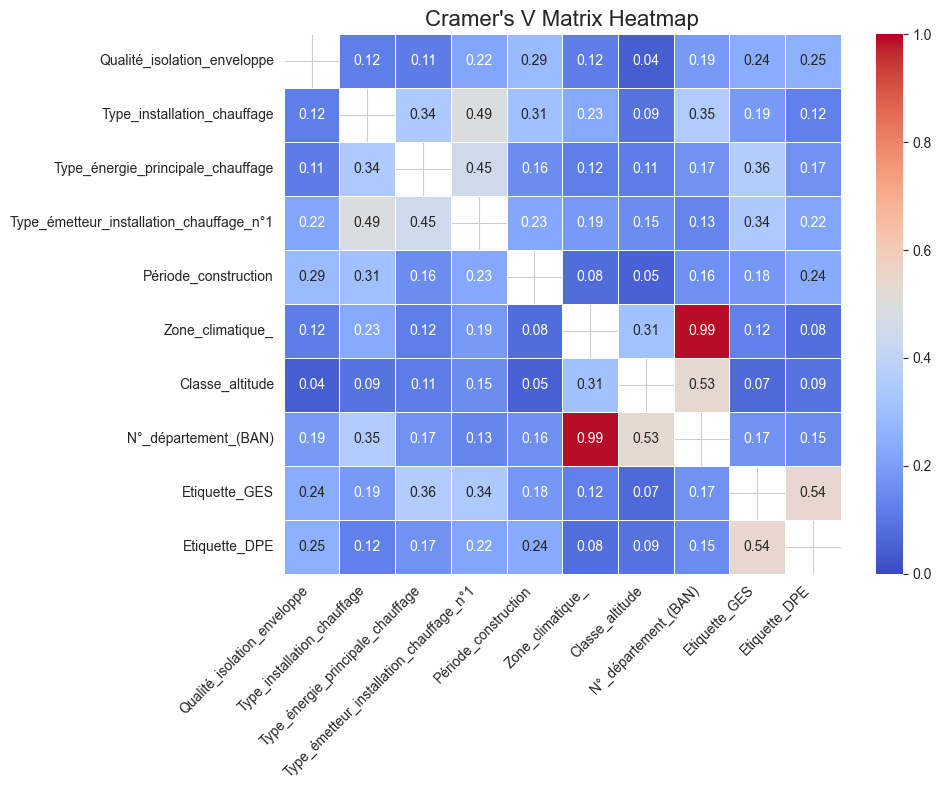

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# ---------------------------
# 1. Définition des fonctions
# ---------------------------
def cramers_v(x, y):
    """
    Calcule le V de Cramer pour deux variables catégorielles.
    """
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    # Nombre de lignes ou colonnes - 1
    k = min(crosstab.shape) - 1
    
    # Éviter les divisions par zéro si k = 0
    if k == 0:
        return np.nan
    
    return np.sqrt(chi2_stat / (n * k))

def cramer_v_matrix(df):
    """
    Crée une matrice de V de Cramer pour toutes les colonnes catégorielles
    d'un DataFrame.
    """
    # On ne considère que les colonnes de type object ou category
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 == col2:
                v_matrix.loc[col1, col2] = np.nan  # On peut mettre 1 ou NaN
            else:
                v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
                
    return v_matrix.astype(float)

# -------------------------------------------
# 3. Extraction des variables & conversion
# -------------------------------------------

# Si nécessaire, convertir certaines colonnes qui sont numériques vers des catégories.
# Par exemple, si 'Période_construction' est déjà textuelle/catégorielle, c'est bon. 
# Sinon, vous pouvez binariser ou catégoriser les colonnes numériques :
# df_subset['Année_construction'] = pd.cut(df_subset['Année_construction'], bins=[...], labels=[...])
# df_subset['Ubat_W/m²_K'] = pd.cut(df_subset['Ubat_W/m²_K'], bins=[...], labels=[...])
# etc.

# Attention : Cramer's V est conçu pour des variables catégorielles.
# Tout ce qui est vraiment continu n'a pas beaucoup de sens en V de Cramer 
# à moins de l'avoir regroupé en classes (binning).

# --------------------------------------------------
# 4. Calcul et affichage de la matrice de Cramer's V
# --------------------------------------------------
# Ne sélectionner que les variables désormais catégorielles (object/category)
df_cat = df_filtered.select_dtypes(include=['object', 'category']).copy()

# Selon votre dataset, il est souvent judicieux de gérer les NaN
# par exemple : df_cat = df_cat.fillna('Inconnu')

v_matrix = cramer_v_matrix(df_cat)

# -------------------------------
# 5. Tracé de la heatmap
# -------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(v_matrix, 
            annot=True,          # Affiche la valeur au centre de chaque case
            cmap='coolwarm', 
            vmin=0, vmax=1, 
            linewidths=0.5, 
            fmt='.2f')           # Format d'affichage des nombres
plt.title("Cramer's V Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Pour éviter le chevauchement des labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Répartion des variables <a class="anchor" id="traitement"></a>

In [11]:
modalites = df_filtered['Etiquette_DPE'].value_counts(normalize=True) * 100
modalites

Etiquette_DPE
C    36.425694
D    30.184722
E    16.372222
F     7.292361
G     4.497222
B     4.414583
A     0.813194
Name: proportion, dtype: float64

In [28]:
import pandas as pd

def repartition_modalites(df):
    """
    Calcule la répartition des modalités en pourcentage pour chaque variable du DataFrame.

    :param df: DataFrame contenant les données.
    :return: Un dictionnaire contenant les pourcentages pour chaque modalité de chaque variable.
    """
    repartition = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Si la variable est quantitative, on ne calcule pas les modalités
            continue
        else:
            # Calcul des pourcentages pour chaque modalité (variables qualitatives)
            repartition[col] = (df[col].value_counts(normalize=True) * 100).round(2).to_dict()
    return repartition


# Appel de la fonction
resultat = repartition_modalites(df_filtered)

# Affichage des résultats
for variable, repartition in resultat.items():
    print(f"Répartition pour '{variable}':")
    for modalite, pourcentage in repartition.items():
        print(f"  {modalite}: {pourcentage}%")
    print()



Répartition pour 'Qualité_isolation_enveloppe':
  insuffisante: 48.23%
  bonne: 22.19%
  moyenne: 18.22%
  très bonne: 11.36%

Répartition pour 'Type_installation_chauffage':
  mixte (collectif-individuel): 61.81%
  individuel: 24.77%
  collectif: 13.42%

Répartition pour 'Type_énergie_principale_chauffage':
  Gaz naturel: 41.54%
  Électricité: 35.2%
  Réseau de Chauffage urbain: 16.51%
  Fioul domestique: 2.56%
  Bois – Bûches: 1.63%
  GPL: 1.63%
  Bois – Granulés (pellets) ou briquettes: 0.77%
  Propane: 0.06%
  Bois – Plaquettes forestières: 0.04%
  Bois – Plaquettes d’industrie: 0.03%
  Électricité d'origine renouvelable utilisée dans le bâtiment: 0.02%
  Charbon: 0.02%
  Réseau de Froid Urbain: 0.0%

Répartition pour 'Type_émetteur_installation_chauffage_n°1':
  Radiateur bitube avec robinet thermostatique sur réseau individuel eau chaude basse ou moyenne température(inf 65°C): 13.15%
  Radiateur bitube avec robinet thermostatique sur réseau collectif eau chaude basse ou moyenne t

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


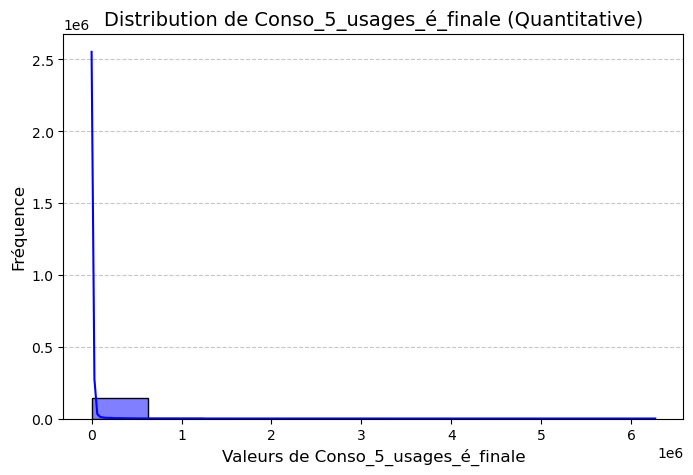

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


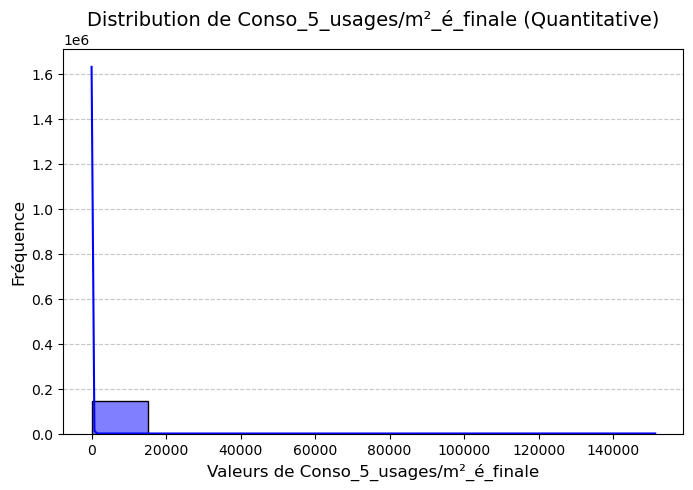

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


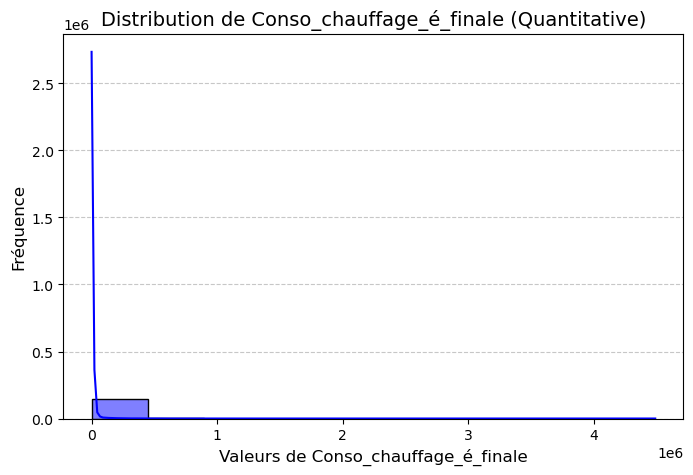

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


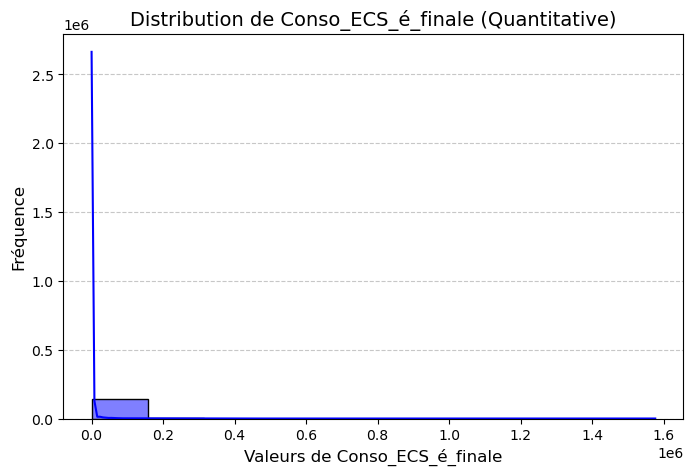

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


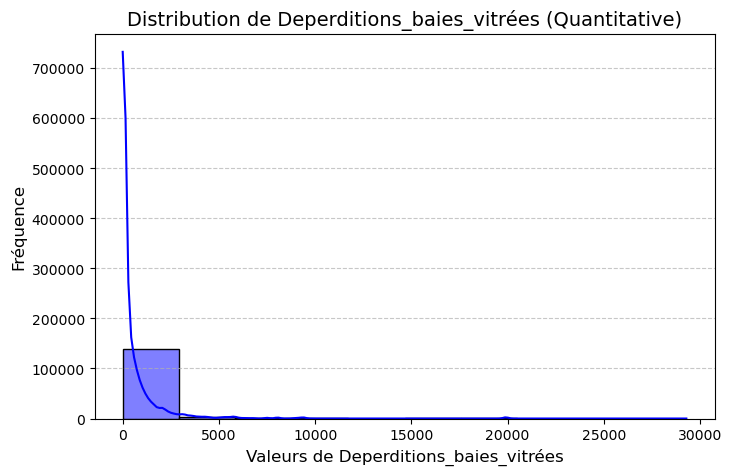

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


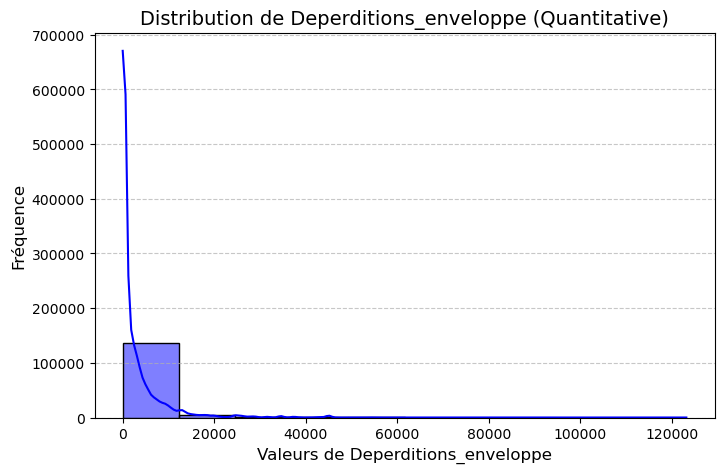

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


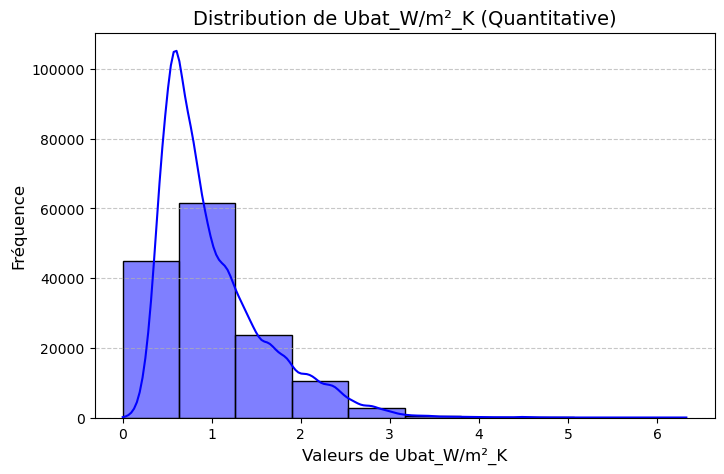

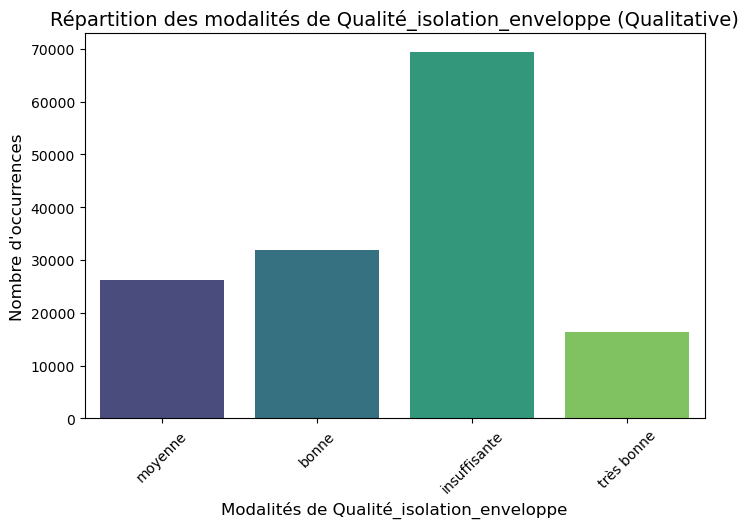

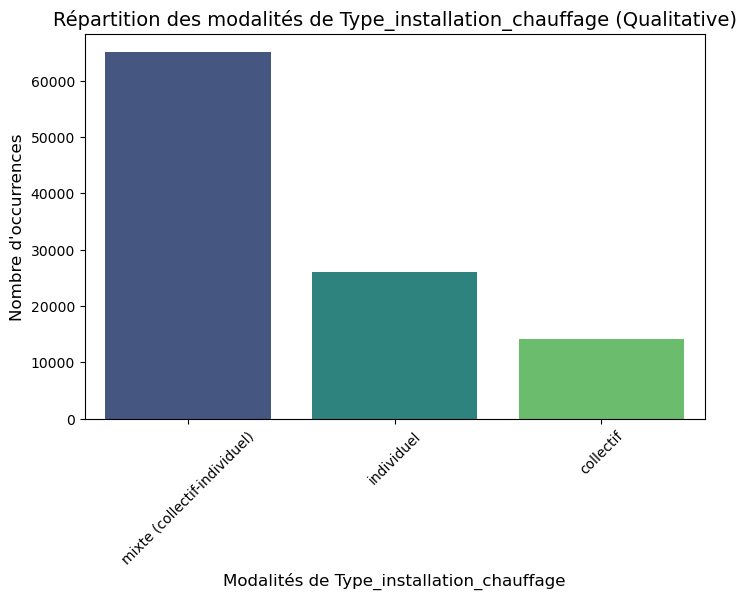

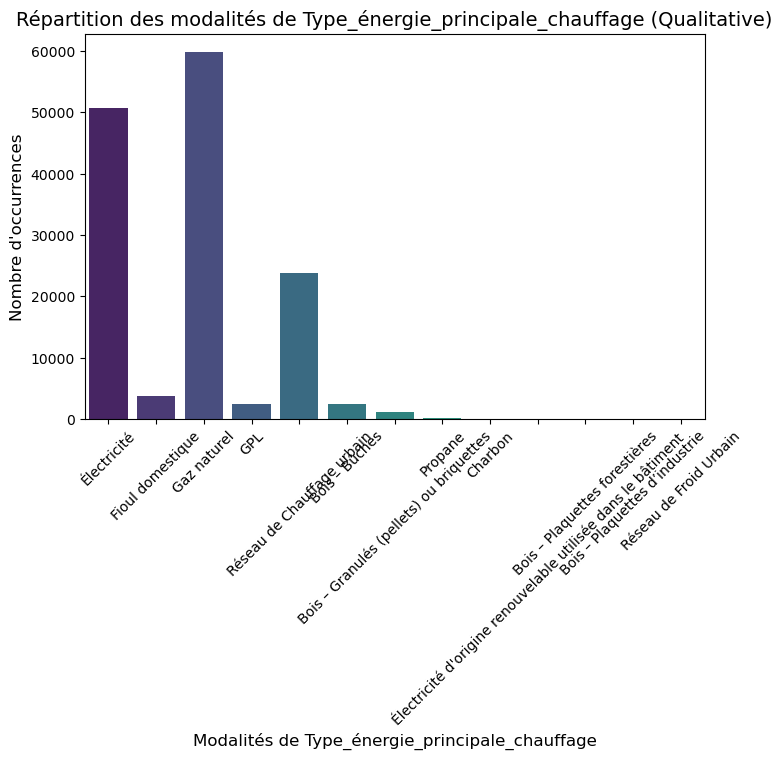

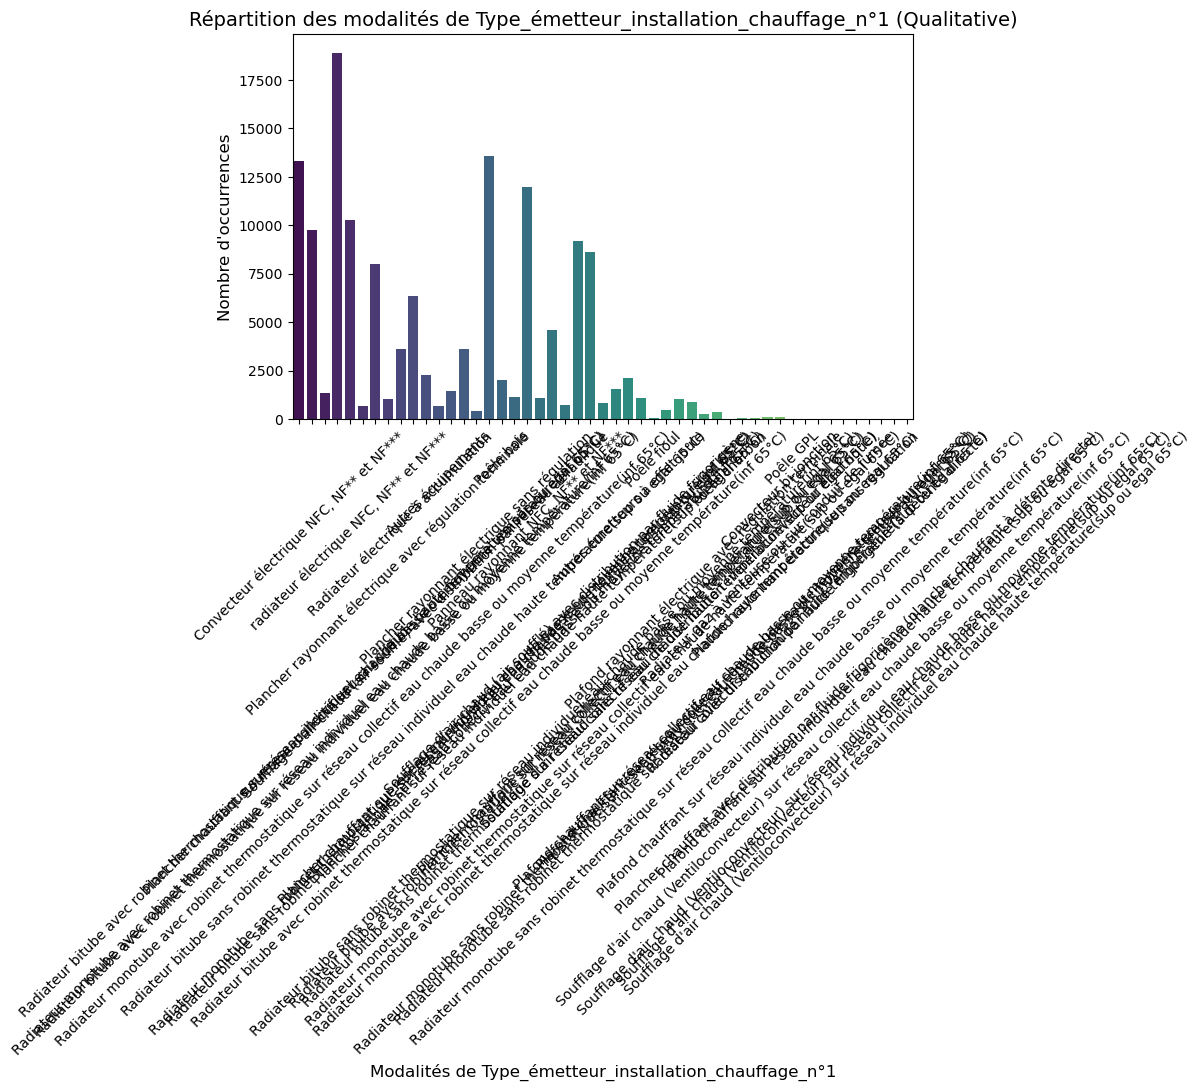

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


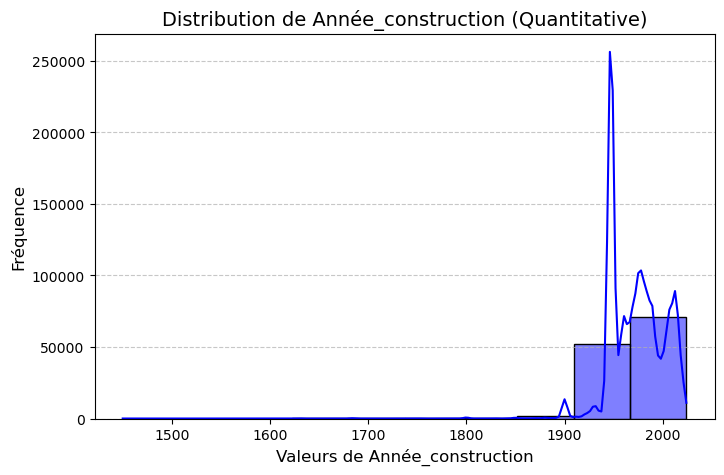

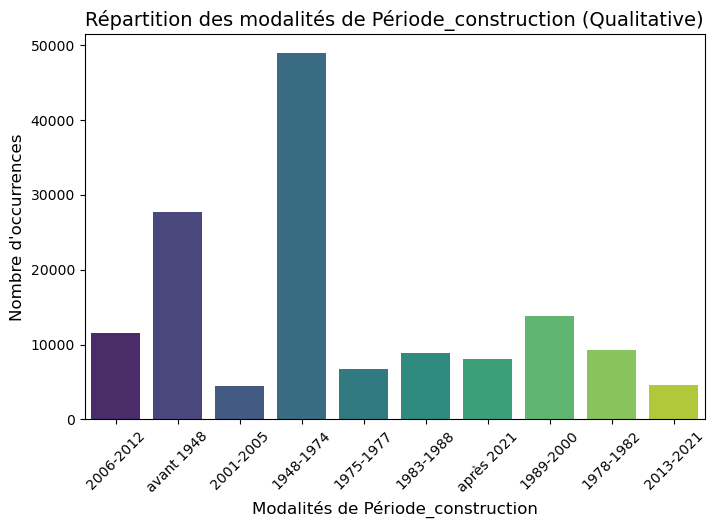

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


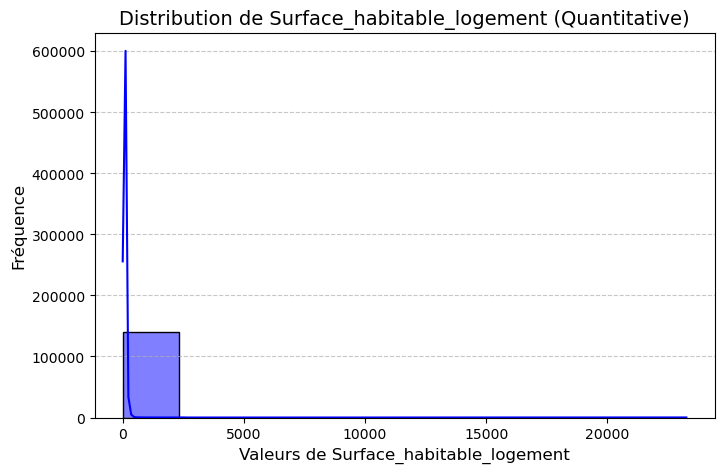

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


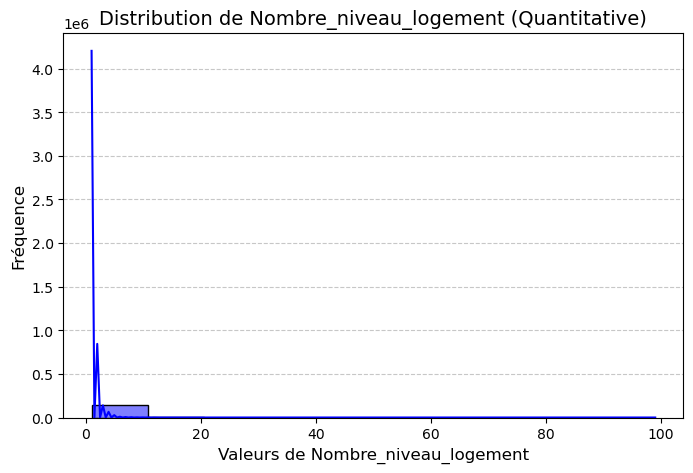

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


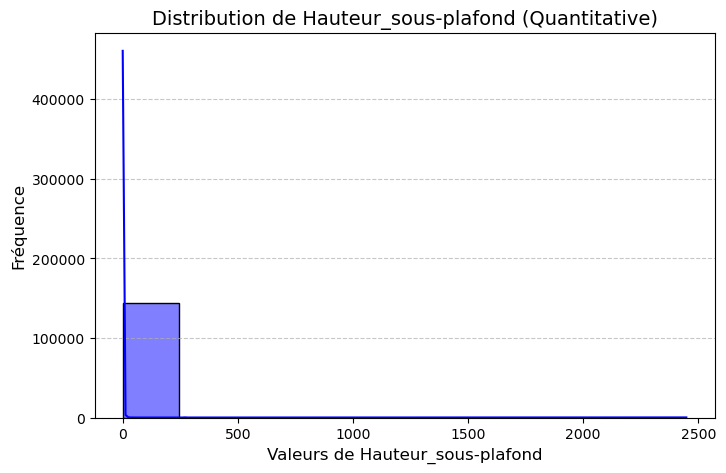

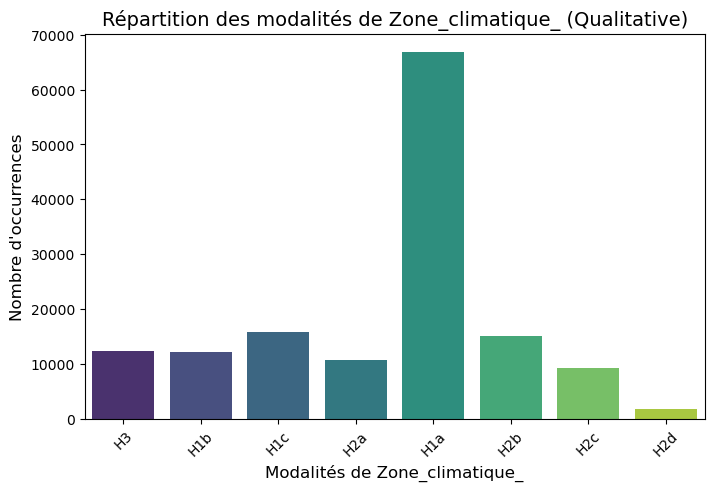

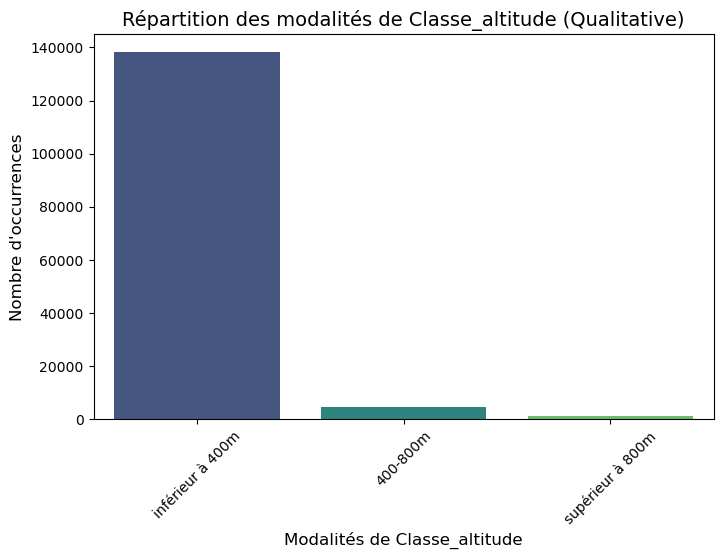

c:\Users\marga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


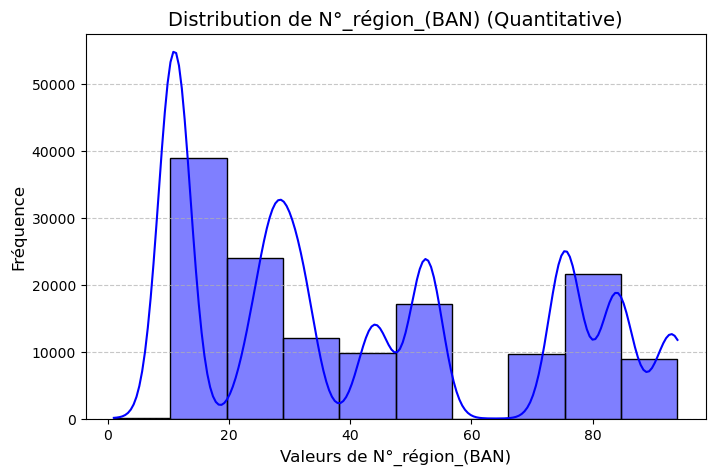

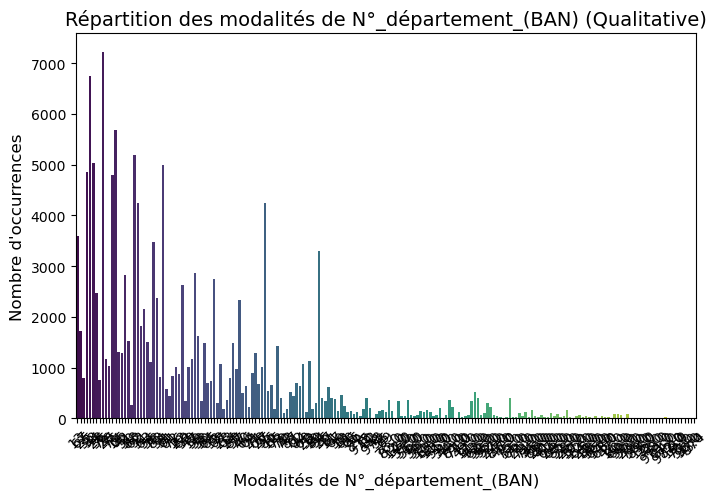

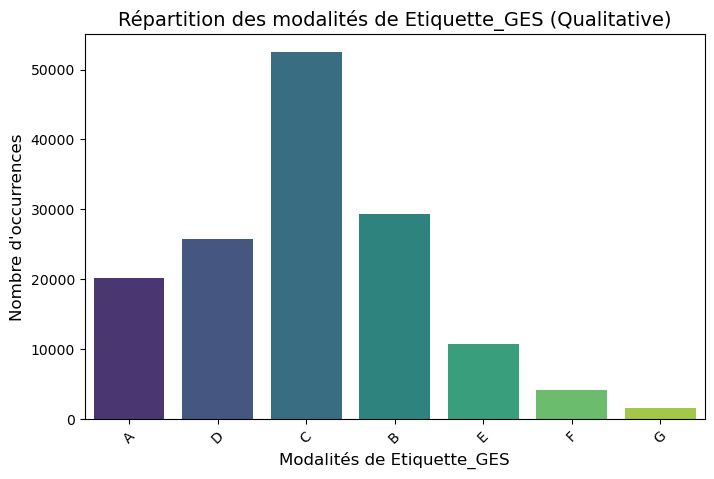

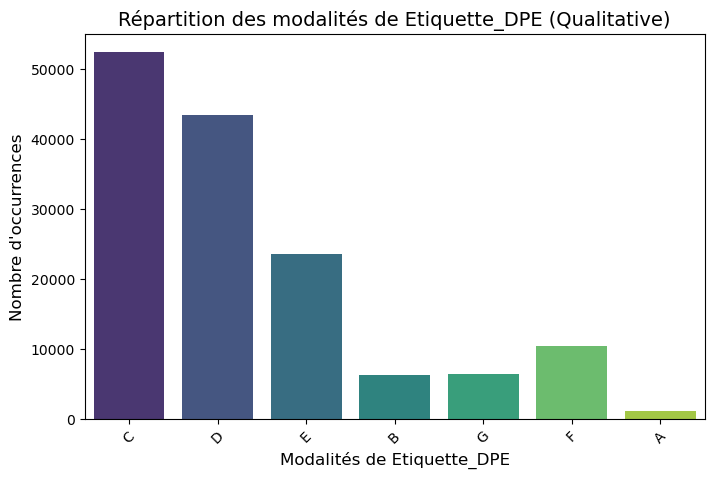

In [27]:
graphique_repartition(df_filtered)

In [ ]:
    # Consommations
    'Conso_5_usages_é_finale', 
    'Conso_5_usages/m²_é_finale', 
    'Conso_chauffage_é_finale', 
    'Conso_ECS_é_finale',
    
    # Isolation
    'Deperditions_baies_vitrées', 
    'Deperditions_enveloppe', 
    'Ubat_W/m²_K', 
    'Qualité_isolation_enveloppe',
    
    # Système de chauffage
    'Type_installation_chauffage', 
    'Type_énergie_principale_chauffage', 
    'Type_émetteur_installation_chauffage_n°1',
    
    # Structure du bâtiment
    'Année_construction', 
    'Période_construction', 
    'Surface_habitable_logement', 
    'Nombre_niveau_logement',
    'Hauteur_sous-plafond',

    
    # Localisation
    'Zone_climatique_', 
    'Classe_altitude', 
    'N°_région_(BAN)', 
    'N°_département_(BAN)',

    # Etiquette 
    'Etiquette_GES',
    'Etiquette_DPE'
]